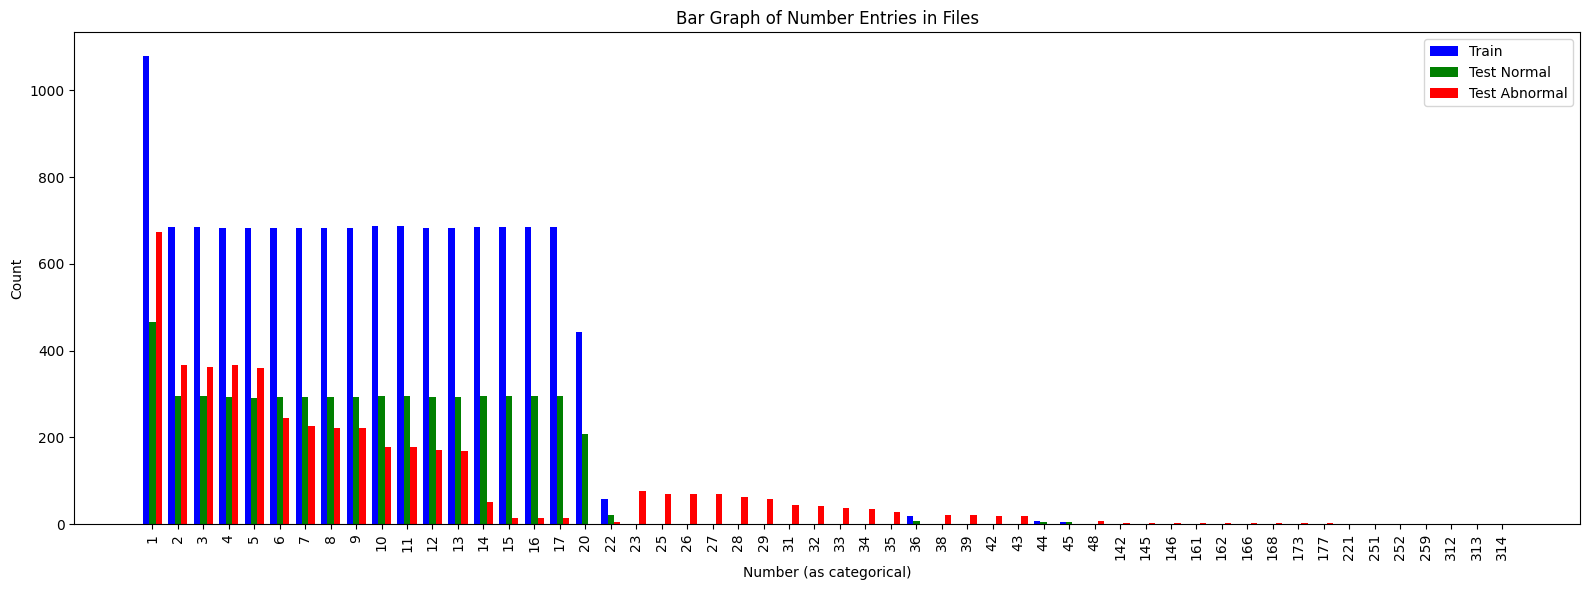

In [7]:
from collections import Counter
import numpy as np

# Prepare data for bar graph

# Count occurrences for each file
train_counts = Counter(num for entry in train_entries for num in entry.split())
test_normal_counts = Counter(num for entry in test_normal_entries for num in entry.split())
test_abnormal_counts = Counter(num for entry in test_abnormal_entries for num in entry.split())

# Get all unique numbers that appear in any file
all_numbers = set(train_counts) | set(test_normal_counts) | set(test_abnormal_counts)

# Remove numbers with zero entries in all files
filtered_numbers = [num for num in all_numbers if train_counts[num] > 0 or test_normal_counts[num] > 0 or test_abnormal_counts[num] > 0]
filtered_numbers = sorted(filtered_numbers, key=int)

# Prepare bar heights
train_heights = [train_counts[num] for num in filtered_numbers]
test_normal_heights = [test_normal_counts[num] for num in filtered_numbers]
test_abnormal_heights = [test_abnormal_counts[num] for num in filtered_numbers]

# Plot

x = np.arange(len(filtered_numbers))
width = 0.25

plt.figure(figsize=(16, 6))
plt.bar(x - width, train_heights, width, label='Train', color='blue')
plt.bar(x, test_normal_heights, width, label='Test Normal', color='green')
plt.bar(x + width, test_abnormal_heights, width, label='Test Abnormal', color='red')
plt.xlabel('Number (as categorical)')
plt.ylabel('Count')
plt.title('Bar Graph of Number Entries in Files')
plt.xticks(x, filtered_numbers, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import matplotlib.pyplot as plt

# Read files and split into number entries
with open("train") as f:
    train_entries = [line.strip() for line in f if line.strip()]
with open("test_normal") as f:
    test_normal_entries = [line.strip() for line in f if line.strip()]
with open("test_abnormal") as f:
    test_abnormal_entries = [line.strip() for line in f if line.strip()]

# Count occurrences for each file
train_counts = Counter(num for entry in train_entries for num in entry.split())
test_normal_counts = Counter(num for entry in test_normal_entries for num in entry.split())
test_abnormal_counts = Counter(num for entry in test_abnormal_entries for num in entry.split())

# Get all unique numbers
all_numbers = set(train_counts) | set(test_normal_counts) | set(test_abnormal_counts)
filtered_numbers = sorted(all_numbers, key=int)

# Calculate percentages
train_total = sum(train_counts.values())
test_normal_total = sum(test_normal_counts.values())
test_abnormal_total = sum(test_abnormal_counts.values())

train_perc = [100 * train_counts[num] / train_total if train_total > 0 else 0 for num in filtered_numbers]
test_normal_perc = [100 * test_normal_counts[num] / test_normal_total if test_normal_total > 0 else 0 for num in filtered_numbers]
test_abnormal_perc = [100 * test_abnormal_counts[num] / test_abnormal_total if test_abnormal_total > 0 else 0 for num in filtered_numbers]

# Dot plot
x = np.arange(len(filtered_numbers))
plt.figure(figsize=(16, 6))
plt.scatter(x, train_perc, color='blue', alpha=0.5, label='Train')
plt.scatter(x, test_normal_perc, color='green', alpha=0.5, label='Test Normal')
plt.scatter(x, test_abnormal_perc, color='red', alpha=0.5, label='Test Abnormal')
plt.xlabel('Number (categorical)')
plt.ylabel('Percentage (%)')
plt.title('Dot Plot of Number Entries by File')
plt.xticks(x, filtered_numbers, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'Counter' is not defined